## Regional Grain Size Model

Dan Buscombe 3/24/22

updated 5/18-20/22

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance

from pingouin import partial_corr
import pingouin as pg

In [2]:
bujan_dat = pd.read_csv('./data/bujan_et_al_data/Size-Slope-Data-Points.csv')
bujan_dat#.keys()

bujan_sand = bujan_dat[bujan_dat['Clast size (mm)']<2]

### load and filter model training /testing data

In [34]:
# join_dist=.0015
# join_dist=.003

choice = 'transects'
merge = 'right'
# dataset = 'Data_Post2012_VerifiedOnshore'
dataset = 'model_data_out/ML_slope_wave_atlantic_2022-05-18_Data_Post2012_VerifiedOnshore_0.0015_right_transects.csv'
# dataset = 'ML_slope_wave_atlantic_2022-05-18_Data_Post2012_VerifiedOnshore_0.003_right_transects.csv'
# dataset = 'ML_slope_wave_atlantic_2022-05-18_Data_Post2012_VerifiedOnshore_0.001_right_transects.csv'

In [35]:
# try:
#     num_cats=10 #8
#     num_samples_per_category = 50

#     tmp['category'] = pd.cut(tmp['mstr'], num_cats)
#     tmp = tmp.groupby(['category']).apply(lambda x: x.sample(num_samples_per_category, replace = True)).reset_index(drop = True)
# except:
#     num_cats=8 #5
#     num_samples_per_category = 50

#     tmp['category'] = pd.cut(tmp['mstr'], num_cats)
#     tmp = tmp.groupby(['category']).apply(lambda x: x.sample(num_samples_per_category, replace = True)).reset_index(drop = True)

In [36]:
# len(tmp)

In [37]:
# # T = []
# # R=[]
# # for k in range(500):

# tmp = pd.read_csv(dataset)
# ind = np.where(tmp['quality_flag_right']!='Low')[0]
# len(ind)
# tmp = tmp.iloc[ind]
# # len(tmp)

# ind = np.where(tmp['quality_flag_left']!='Low')[0]
# len(ind)
# tmp = tmp.iloc[ind]
# # len(tmp)

# try:
#     num_cats=18 #19 #8
#     num_samples_per_category = 12

#     tmp['category'] = pd.cut(tmp['latitude'], num_cats)
#     tmp = tmp.groupby(['category']).apply(lambda x: x.sample(num_samples_per_category, replace = False)).reset_index(drop = True)
# #         print('yes')

# except:
#     num_cats=15 #5
#     num_samples_per_category = 12

#     tmp['category'] = pd.cut(tmp['latitude'], num_cats)
#     tmp = tmp.groupby(['category']).apply(lambda x: x.sample(num_samples_per_category, replace = False)).reset_index(drop = True)

# tmp = tmp.drop_duplicates()    
# # R.append(np.min(np.corrcoef(tmp['d50'],tmp['beach_slope'])))
# # T.append(tmp) 

In [38]:
# use = np.argmax(R)
# [len(tmp) for tmp in T][use]

In [39]:
# [len(tmp) for tmp in T]

In [40]:
# use = np.argmax([len(tmp) for tmp in T])
# print(use)

In [41]:
# tmp = T[use]
# len(tmp)

In [42]:
# tmp['category_left'] = tmp['category'].apply(lambda x: x.left)
# tmp['category_right'] = tmp['category'].apply(lambda x: x.right)

### save data

In [43]:
# del tmp["category"]

In [44]:
# tmp.to_csv(dataset.replace('.csv','_model_stratsample5.csv')) # 214 samples (max length)
# tmp.to_csv(dataset.replace('.csv','_model_stratsample6.csv')) # 203 samples (max correl slope-d50)
# tmp.to_csv(dataset.replace('.csv','_model_stratsample7.csv')) # 217 samples (max length)

In [45]:
# tmp.to_csv(dataset.replace('.csv','_model_stratsample8.csv')) # 216 samples (no replacement)

In [46]:
tmp = pd.read_csv(dataset.replace('.csv','_model_stratsample8.csv'))

### exploratory plots

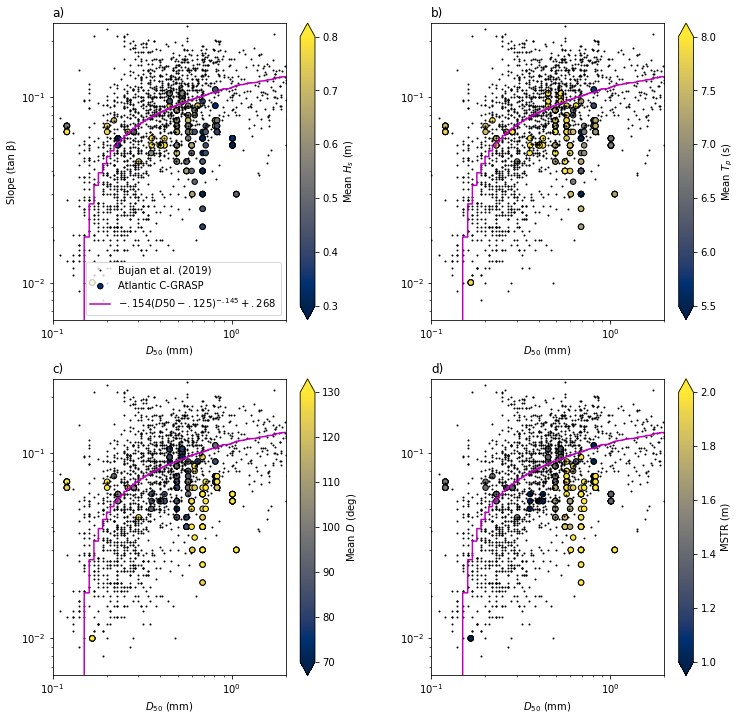

In [47]:
plt.figure(figsize=(12,12))
plt.subplots_adjust(wspace=0.3, hspace=0.2)

plt.subplot(221)

plt.loglog(bujan_dat['Clast size (mm)'], bujan_dat['Slope (tan β)'],'ko', markersize=1, label='Bujan et al. (2019)')
# plt.scatter(gs_slope_waves['d50'], gs_slope_waves['tanBeta'],20,gs_slope_waves['hs_mean'],label='Atlantic C-GRASP')
plt.scatter(tmp['d50'], tmp['beach_slope'],30,tmp['hs_mean'],label='Atlantic C-GRASP', cmap='cividis', vmin=.3, vmax=.8, lw=1,edgecolors='black')

plt.xlabel(r'$D_{50}$ (mm)')

plt.ylabel('Slope (tan β)')
cb = plt.colorbar(extend='both')
plt.title("a)", loc='left')


cb.set_label(r'Mean $H_s$ (m)')

a = -0.154
b = -0.145
c = 0.268
ln = a*( bujan_dat['Clast size (mm)'] - 0.125)**b + c

plt.plot(np.sort(bujan_dat['Clast size (mm)']), np.sort(ln),'m', label=r'$-.154(D50 - .125)^{-.145} + .268$')

plt.xlim(0.1,2)
plt.ylim(10**-2.2,10**-.6)

plt.legend()

plt.subplot(222)
plt.loglog(bujan_dat['Clast size (mm)'], bujan_dat['Slope (tan β)'],'ko', markersize=1, label='Bujan et al. (2019)')
plt.scatter(tmp['d50'], tmp['beach_slope'],30,tmp['tp'],label='Atlantic C-GRASP', cmap='cividis', vmin=5.5, vmax=8, lw=1,edgecolors='black')
plt.title("b)", loc='left')

plt.xlabel(r'$D_{50}$ (mm)')

# plt.ylabel('Slope (tan β)')
cb = plt.colorbar(extend='both')

cb.set_label(r'Mean $T_p$ (s)')

a = -0.154
b = -0.145
c = 0.268
ln = a*( bujan_dat['Clast size (mm)'] - 0.125)**b + c

plt.plot(np.sort(bujan_dat['Clast size (mm)']), np.sort(ln),'m', label=r'$-.154(D50 - .125)^{-.145} + .268$')

plt.xlim(0.1,2)
plt.ylim(10**-2.2,10**-.6)

plt.subplot(223)
plt.loglog(bujan_dat['Clast size (mm)'], bujan_dat['Slope (tan β)'],'ko', markersize=1, label='Bujan et al. (2019)')
plt.scatter(tmp['d50'], tmp['beach_slope'],30,tmp['dir'],label='Atlantic C-GRASP', cmap='cividis', vmin=70, vmax=130, lw=1,edgecolors='black')

plt.xlabel(r'$D_{50}$ (mm)')

# plt.ylabel('Slope (tan β)')
cb = plt.colorbar(extend='both')

cb.set_label(r'Mean $D$ (deg)')

a = -0.154
b = -0.145
c = 0.268
ln = a*( bujan_dat['Clast size (mm)'] - 0.125)**b + c

plt.plot(np.sort(bujan_dat['Clast size (mm)']), np.sort(ln),'m', label=r'$-.154(D50 - .125)^{-.145} + .268$')
plt.title("c)", loc='left')

plt.ylim(10**-2.2,10**-.6)
plt.xlim(0.1,2)


plt.subplot(224)
plt.loglog(bujan_dat['Clast size (mm)'], bujan_dat['Slope (tan β)'],'ko', markersize=1, label='Bujan et al. (2019)')
plt.scatter(tmp['d50'], tmp['beach_slope'],30,tmp['mstr'],label='Atlantic C-GRASP', cmap='cividis', vmin=1, vmax=2, lw=1,edgecolors='black')

plt.xlabel(r'$D_{50}$ (mm)')

# plt.ylabel('Slope (tan β)')
cb = plt.colorbar(extend='both')

cb.set_label(r'MSTR (m)')

a = -0.154
b = -0.145
c = 0.268
ln = a*( bujan_dat['Clast size (mm)'] - 0.125)**b + c

plt.plot(np.sort(bujan_dat['Clast size (mm)']), np.sort(ln),'m', label=r'$-.154(D50 - .125)^{-.145} + .268$')
plt.title("d)", loc='left')

plt.ylim(10**-2.2,10**-.6)
plt.xlim(0.1,2)

plt.savefig('data_plots/CGRASP_d50-slope-waveHs-Tp-Dir-MSTR-v2.jpg', dpi=300, bbox_inches='tight')

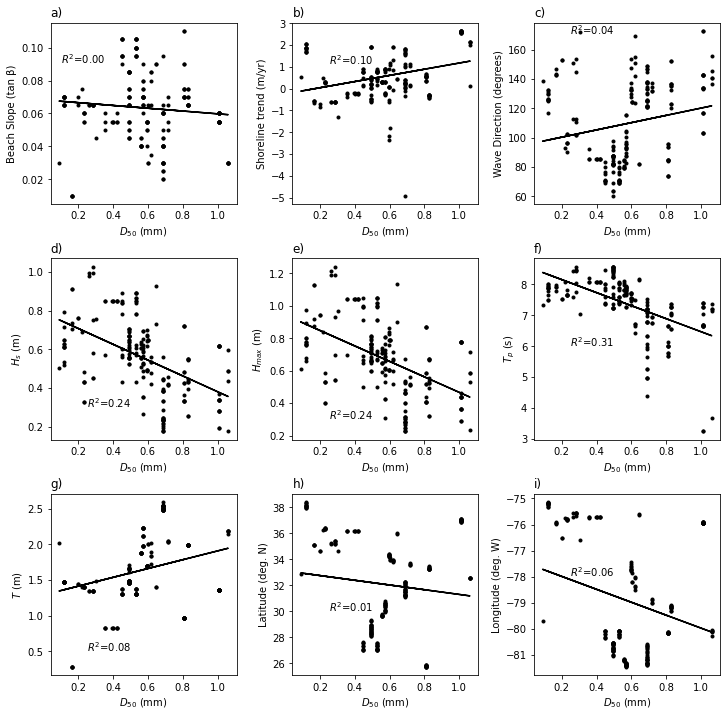

In [48]:
plt.figure(figsize=(12,12))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

plt.subplot(331)
plt.plot(tmp['d50'], tmp['beach_slope'],'k.')
plt.xlabel(r'$D_{50}$ (mm)')
plt.ylabel('Beach Slope (tan β)')
plt.title("a)", loc='left')

coef = np.polyfit(tmp['d50'], tmp['beach_slope'],1)
poly1d_fn = np.poly1d(coef) 
plt.plot(tmp['d50'], poly1d_fn(tmp['d50']), '-k')

r2 = np.min(np.corrcoef(tmp['d50'], tmp['beach_slope']))**2
plt.text(.1,.09,r'$R^2$='+str(r2)[:4])

plt.subplot(332)
plt.plot(tmp['d50'], tmp['trend'],'k.')
plt.xlabel(r'$D_{50}$ (mm)')
plt.ylabel('Shoreline trend (m/yr)')
plt.title("b)", loc='left')

coef = np.polyfit(tmp['d50'], tmp['trend'],1)
poly1d_fn = np.poly1d(coef) 
plt.plot(tmp['d50'], poly1d_fn(tmp['d50']), '-k')

r2 = np.min(np.corrcoef(tmp['d50'], tmp['trend']))**2
plt.text(.25,1.1,r'$R^2$='+str(r2)[:4])

plt.subplot(333)
plt.plot(tmp['d50'], tmp['dir'],'k.')
plt.xlabel(r'$D_{50}$ (mm)')
plt.ylabel('Wave Direction (degrees)')
plt.title("c)", loc='left')

coef = np.polyfit(tmp['d50'], tmp['dir'],1)
poly1d_fn = np.poly1d(coef) 
plt.plot(tmp['d50'], poly1d_fn(tmp['d50']), '-k')

r2 = np.min(np.corrcoef(tmp['d50'], tmp['dir']))**2
plt.text(.25,170,r'$R^2$='+str(r2)[:4])

plt.subplot(334)
plt.plot(tmp['d50'], tmp['hs_mean'],'k.')
plt.xlabel(r'$D_{50}$ (mm)')
plt.ylabel(r'$H_{s}$ (m)')
plt.title("d)", loc='left')

coef = np.polyfit(tmp['d50'], tmp['hs_mean'],1)
poly1d_fn = np.poly1d(coef) 
plt.plot(tmp['d50'], poly1d_fn(tmp['d50']), '-k')

r2 = np.min(np.corrcoef(tmp['d50'], tmp['hs_mean']))**2
plt.text(.25,.3,r'$R^2$='+str(r2)[:4])

plt.subplot(335)
plt.plot(tmp['d50'], tmp['hs_max'],'k.')
plt.xlabel(r'$D_{50}$ (mm)')
plt.ylabel(r'$H_{max}$ (m)')
plt.title("e)", loc='left')

coef = np.polyfit(tmp['d50'], tmp['hs_max'],1)
poly1d_fn = np.poly1d(coef) 
plt.plot(tmp['d50'], poly1d_fn(tmp['d50']), '-k')

r2 = np.min(np.corrcoef(tmp['d50'], tmp['hs_max']))**2
plt.text(.25,.3,r'$R^2$='+str(r2)[:4])

plt.subplot(336)
plt.plot(tmp['d50'], tmp['tp'],'k.')
plt.xlabel(r'$D_{50}$ (mm)')
plt.ylabel(r'$T_{p}$ (s)')
plt.title("f)", loc='left')

coef = np.polyfit(tmp['d50'], tmp['tp'],1)
poly1d_fn = np.poly1d(coef) 
plt.plot(tmp['d50'], poly1d_fn(tmp['d50']), '-k')

r2 = np.min(np.corrcoef(tmp['d50'], tmp['tp']))**2
plt.text(.25,6,r'$R^2$='+str(r2)[:4])

plt.subplot(337)
plt.plot(tmp['d50'],tmp['mstr'] ,'k.')
plt.xlabel(r'$D_{50}$ (mm)')
plt.ylabel(r'$T$ (m)')
plt.title("g)", loc='left')

coef = np.polyfit(tmp['d50'], tmp['mstr'],1)
poly1d_fn = np.poly1d(coef) 
plt.plot(tmp['d50'], poly1d_fn(tmp['d50']), '-k')

r2 = np.min(np.corrcoef(tmp['d50'], tmp['mstr']))**2
plt.text(.25,.5,r'$R^2$='+str(r2)[:4])

plt.subplot(338)
plt.plot(tmp['d50'],tmp['latitude'] ,'k.')
plt.xlabel(r'$D_{50}$ (mm)')
plt.ylabel(r'Latitude (deg. N)')
plt.title("h)", loc='left')

coef = np.polyfit(tmp['d50'], tmp['latitude'],1)
poly1d_fn = np.poly1d(coef) 
plt.plot(tmp['d50'], poly1d_fn(tmp['d50']), '-k')

r2 = np.min(np.corrcoef(tmp['d50'], tmp['latitude']))**2
plt.text(.25,30,r'$R^2$='+str(r2)[:4])

plt.subplot(339)
plt.plot(tmp['d50'],tmp['longitude'] ,'k.')
plt.xlabel(r'$D_{50}$ (mm)')
plt.ylabel(r'Longitude (deg. W)')
plt.title("i)", loc='left')

coef = np.polyfit(tmp['d50'], tmp['longitude'],1)
poly1d_fn = np.poly1d(coef) 
plt.plot(tmp['d50'], poly1d_fn(tmp['d50']), '-k')

r2 = np.min(np.corrcoef(tmp['d50'], tmp['longitude']))**2
plt.text(.25,-78,r'$R^2$='+str(r2)[:4])

plt.savefig('data_plots/CGRASP_d50-allcovars-linreg-v2.jpg', dpi=300, bbox_inches='tight')

### make models

In [49]:
def mcfall(X,hs):
    if hs<=1:
        A = 3.1; n = -1.1 
    elif hs>=3:
        A = 3.9; n = -1.85         
    else:
        A = 2.1; n = -1.8             
    return (X/A)**(1/n)

In [50]:
def prc_err(y,yest):
    return 100*(np.abs(y-yest)/y)

In [51]:
def bujan(B,a,b,c):
    t1=(B-c)
    return (1/8)*(8*((t1/a))**(1/b)+1)

In [52]:
# from sklearn.neighbors import KNeighborsRegressor

In [53]:
# test_size = 0.75 #0.6

In [54]:
# rand = np.load(dataset.replace('.csv','_rand.npy').replace('model_data_out','model_out'), allow_pickle=True)

In [55]:
# feature_names1 = ['β (radians)', 'S (m/yr)', 'T (m)', 'Random']
# X = np.stack((tmp['beach_slope_median'],tmp['trend'],tmp['mstr'], rand))
# #lam,df['hs_max'],
# X.shape

# X_train1, X_test1, y_train1, y_test1 = train_test_split(
#     X.T, tmp['d50'], test_size=test_size, random_state=2022
# )

# model1 = KNeighborsRegressor(n_neighbors=2)
# model1.fit(X_train1, y_train1)

# mse1 = mean_squared_error(y_test1, model1.predict(X_test1))
# print("The mean squared error (MSE) on test set: {:.4f}".format(mse1))

In [56]:
params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 10, #5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

test_size = 0.75 #0.6

In [57]:
# rand = np.random.randn(len(tmp))
# np.save(dataset.replace('.csv','_rand.npy').replace('model_data_out','model_out'), rand, allow_pickle=True)

In [58]:
rand = np.load(dataset.replace('.csv','_rand.npy').replace('model_data_out','model_out'), allow_pickle=True)

In [59]:
feature_names1 = ['β (radians)', 'S (m/yr)', 'T (m)', 'Random']
X = np.stack((tmp['beach_slope_median'],tmp['trend'],tmp['mstr'], rand))
#lam,df['hs_max'],
X.shape

X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X.T, tmp['d50'], test_size=test_size, random_state=2022
)

model1 = ensemble.GradientBoostingRegressor(**params)
model1.fit(X_train1, y_train1)

mse1 = mean_squared_error(y_test1, model1.predict(X_test1))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse1))

The mean squared error (MSE) on test set: 0.0257


In [60]:
model1out = {}
model1out['feature_names'] = feature_names1
model1out['Xtest'] = X_test1
model1out['Xtrain'] = X_train1
model1out['ytest'] = y_test1
model1out['ytrain'] = y_train1
model1out['model'] = model1
model1out['mse'] = mse1

In [61]:
feature_names2 = [r'β (radians)','T (m)', 'Random (non-dim.)']
X = np.stack((tmp['beach_slope_median'],tmp['mstr'], rand))
#lam,df['hs_max'],
X.shape

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X.T, tmp['d50'], test_size=test_size, random_state=2022
)

model2 = ensemble.GradientBoostingRegressor(**params)
model2.fit(X_train2, y_train2)

mse2 = mean_squared_error(y_test2, model2.predict(X_test2))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse2))

The mean squared error (MSE) on test set: 0.0108


In [62]:
model2out = {}
model2out['feature_names'] = feature_names2
model2out['Xtest'] = X_test2
model2out['Xtrain'] = X_train2
model2out['ytest'] = y_test2
model2out['ytrain'] = y_train2
model2out['model'] = model2
model2out['mse'] = mse2

In [63]:
feature_names3 = [r'$H_s$ (m)', r'$T_p$ (s)', r'$\theta$ (dir.)', 'Random (non-dim.)']
X = np.stack((tmp['hs_mean'],tmp['tp'],tmp['dir'], rand))
#lam,df['hs_max'],
X.shape

X_train3, X_test3, y_train3, y_test3 = train_test_split(
    X.T, tmp['d50'], test_size=test_size, random_state=2022
)

model3 = ensemble.GradientBoostingRegressor(**params)
model3.fit(X_train3, y_train3)

mse3 = mean_squared_error(y_test3, model3.predict(X_test3))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse3))

The mean squared error (MSE) on test set: 0.0298


In [64]:
model3out = {}
model3out['feature_names'] = feature_names3
model3out['Xtest'] = X_test3
model3out['Xtrain'] = X_train3
model3out['ytest'] = y_test3
model3out['ytrain'] = y_train3
model3out['model'] = model3
model3out['mse'] = mse3

In [65]:
feature_names4 = [r'$H_s$ (m)', r'$T_p$ (s)', r'$\theta$ (dir.)','T (m)', 'Random (non-dim.)']
X = np.stack((tmp['hs_mean'],tmp['tp'],tmp['dir'],tmp['mstr'], rand))
X.shape

X_train4, X_test4, y_train4, y_test4 = train_test_split(
    X.T, tmp['d50'], test_size=test_size, random_state=2022
)

model4 = ensemble.GradientBoostingRegressor(**params)
model4.fit(X_train4, y_train4)

mse4 = mean_squared_error(y_test4, model4.predict(X_test4))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse4))

The mean squared error (MSE) on test set: 0.0190


In [66]:
model4out = {}
model4out['feature_names'] = feature_names4
model4out['Xtest'] = X_test4
model4out['Xtrain'] = X_train4
model4out['ytest'] = y_test4
model4out['ytrain'] = y_train4
model4out['model'] = model4
model4out['mse'] = mse4

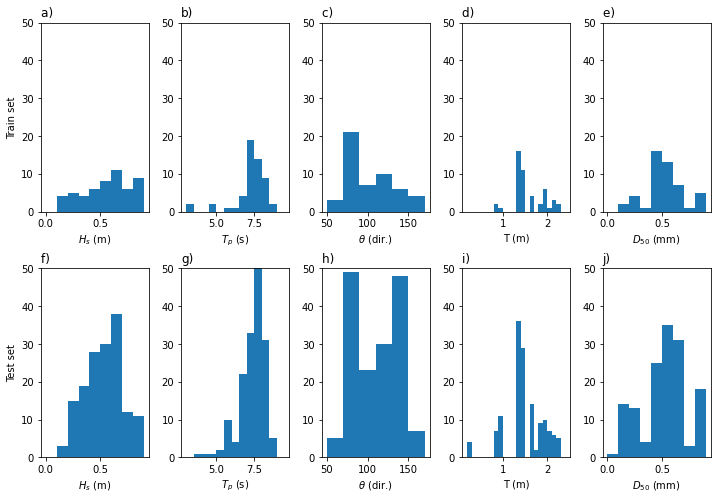

In [67]:
fig = plt.figure(figsize=(12,8))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

plt.subplot(2,5,1)
plt.hist(X_train4[:,0], bins=np.arange(0,1,.1))
plt.ylim(0,50); plt.ylabel('Train set'); plt.xlabel(r'$H_s$ (m)')
plt.title(r'a) ', loc='left')

plt.subplot(2,5,2)
plt.hist(X_train4[:,1], bins=np.arange(3,10,.5))
plt.ylim(0,50); plt.xlabel(r'$T_p$ (s)')
plt.title(r'b)', loc='left')

plt.subplot(2,5,3)
plt.hist(X_train4[:,2], bins=np.arange(50,180,20))
plt.ylim(0,50); plt.xlabel(r'$\theta$ (dir.)')
plt.title(r'c) ', loc='left')

plt.subplot(2,5,4)
plt.hist(X_train4[:,3], bins=np.arange(0.2,2.5,.1))
plt.ylim(0,50); plt.xlabel('T (m)')
plt.title(r'd) ', loc='left')

plt.subplot(2,5,5)
plt.hist(y_train4, bins=np.arange(0,1,.1))
plt.ylim(0,50); plt.xlabel(r'$D_{50}$ (mm)')
plt.title(r'e) ', loc='left')

plt.subplot(2,5,6)
plt.hist(X_test4[:,0], bins=np.arange(0,1,.1))
plt.ylim(0,50); plt.ylabel('Test set'); plt.xlabel(r'$H_s$ (m)')
plt.title(r'f) ', loc='left')

plt.subplot(2,5,7)
plt.hist(X_test4[:,1], bins=np.arange(3,10,.5))
plt.ylim(0,50); plt.xlabel(r'$T_p$ (s)')
plt.title(r'g)', loc='left')

plt.subplot(2,5,8)
plt.hist(X_test4[:,2], bins=np.arange(50,180,20))
plt.ylim(0,50); plt.xlabel(r'$\theta$ (dir.)')
plt.title(r'h) ', loc='left')

plt.subplot(2,5,9)
plt.hist(X_test4[:,3], bins=np.arange(0.2,2.5,.1))
plt.ylim(0,50); plt.xlabel('T (m)')
plt.title(r'i) ', loc='left')

plt.subplot(2,5,10)
plt.hist(y_test4, bins=np.arange(0,1,.1))
plt.ylim(0,50); plt.xlabel('$D_{50}$ (mm)')
plt.title(r'j) ', loc='left')

plt.savefig('data_plots/CGRASP_d50-test_train_dists.jpg', dpi=300, bbox_inches='tight')

In [68]:
feature_names5 = ['T (m)', 'Random (non-dim.)']
X = np.stack((tmp['mstr'], rand))
X.shape

X_train5, X_test5, y_train5, y_test5 = train_test_split(
    X.T, tmp['d50'], test_size=test_size, random_state=2022
)

model5 = ensemble.GradientBoostingRegressor(**params)
model5.fit(X_train5, y_train5)

mse5 = mean_squared_error(y_test5, model5.predict(X_test5))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse5))

The mean squared error (MSE) on test set: 0.0229


In [69]:
model5out = {}
model5out['feature_names'] = feature_names5
model5out['Xtest'] = X_test5
model5out['Xtrain'] = X_train5
model5out['ytest'] = y_test5
model5out['ytrain'] = y_train5
model5out['model'] = model5
model5out['mse'] = mse5

In [70]:
ds_est_baseline = [mcfall(X,hs) for X,hs in zip(1/tmp['beach_slope'],tmp['hs_mean'])]

In [71]:
# plt.hist(ds_est_baseline)

In [72]:
a = -0.154
b = -0.145
c = 0.268

ds_est_baseline2 = [bujan(B,a,b,c) for B in tmp['beach_slope']]

In [73]:
# plt.hist(ds_est_baseline2)

In [74]:
# plt.hexbin?

In [75]:
# plt.hexbin(ds_est_baseline, ds_est_baseline2, gridsize=(20,20) )
# plt.plot(ds_est_baseline,ds_est_baseline,'r')

### model skill

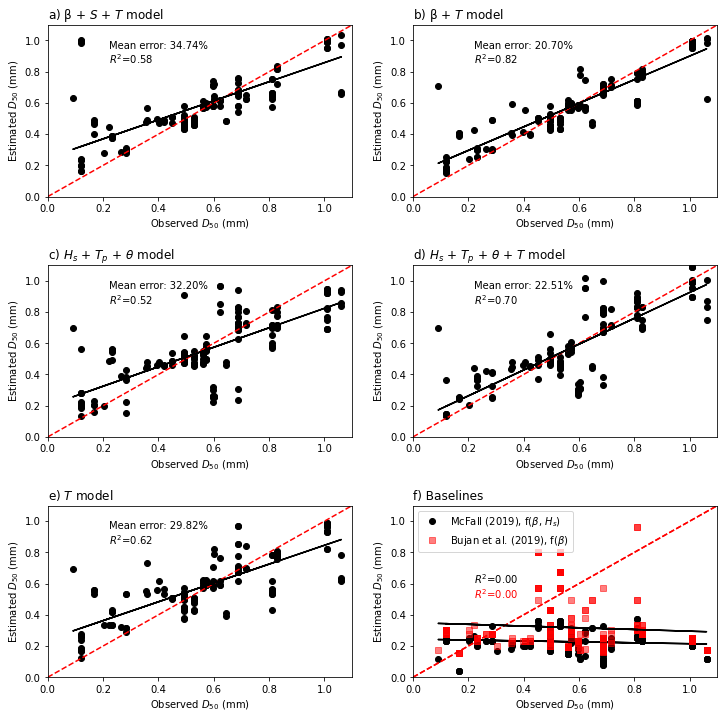

In [76]:
plt.figure(figsize=(12,12))
plt.subplots_adjust(wspace=0.2, hspace=0.4)

plt.subplot(321)
ds_est = model1.predict(X_test1)
plt.plot(y_test1, ds_est, 'ko')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title("a) β + $S$ + $T$ model", loc='left')
r2 = np.min(np.corrcoef(y_test1, ds_est))**2
plt.text(.22,.85,r'$R^2$='+str(r2)[:4])
plt.text(.22,.95, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test1,ds_est)))[:5]))

coef = np.polyfit(y_test1, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test1, poly1d_fn(y_test1), '-k')

plt.subplot(322)
ds_est = model2.predict(X_test2)
plt.plot(y_test2, ds_est, 'ko')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title("b) β + $T$ model", loc='left')
r2 = np.min(np.corrcoef(y_test2, ds_est))**2
plt.text(.22,.85,r'$R^2$='+str(r2)[:4])

coef = np.polyfit(y_test2, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test2, poly1d_fn(y_test2), '-k')
plt.text(.22,.95, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test2,ds_est)))[:5]))

plt.subplot(323)
ds_est = model3.predict(X_test3)
plt.plot(y_test3, ds_est, 'ko')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"c) $H_s$ + $T_p$ + $\theta$ model", loc='left')
r2 = np.min(np.corrcoef(y_test3, ds_est))**2
plt.text(.22,.85,r'$R^2$='+str(r2)[:4])

coef = np.polyfit(y_test3, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test3, poly1d_fn(y_test3), '-k')
plt.text(.22,.95, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test3,ds_est)))[:5]))


plt.subplot(324)
ds_est = model4.predict(X_test4)
plt.plot(y_test4, ds_est, 'ko')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"d) $H_s$ + $T_p$ + $\theta$ + $T$ model", loc='left')
r2 = np.min(np.corrcoef(y_test4, ds_est))**2
plt.text(.22,.85,r'$R^2$='+str(r2)[:4])

coef = np.polyfit(y_test4, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test4, poly1d_fn(y_test4), '-k')
plt.text(.22,.95, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test4,ds_est)))[:5]))


plt.subplot(325)
ds_est = model5.predict(X_test5)
plt.plot(y_test5, ds_est, 'ko')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"e) $T$ model", loc='left')
r2 = np.min(np.corrcoef(y_test5, ds_est))**2
plt.text(.22,.85,r'$R^2$='+str(r2)[:4])

coef = np.polyfit(y_test5, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test5, poly1d_fn(y_test5), '-k')
plt.text(.22,.95, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test5,ds_est)))[:5]))


plt.subplot(326)
plt.plot(tmp['d50'], ds_est_baseline, 'ko', label=r'McFall (2019), f($\beta$, $H_s$)')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"f) Baselines", loc='left')
r2 = np.min(np.corrcoef(tmp['d50'], ds_est_baseline))**2
plt.text(.22,.6,r'$R^2$='+str(r2)[:4])

coef = np.polyfit(tmp['d50'], ds_est_baseline,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(tmp['d50'], poly1d_fn(tmp['d50']), '-k')


# plt.subplot(326)
plt.plot(tmp['d50'], ds_est_baseline2, 'rs', alpha=0.5, label=r"Bujan et al. (2019), f($\beta$)")
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
# plt.title(r"f) Bujan et al. (2019) relation, f($\beta$)", loc='left')
r2 = np.min(np.corrcoef(tmp['d50'], ds_est_baseline2))**2
plt.text(.22,.5,r'$R^2$='+str(r2)[:4], color='r')

coef = np.polyfit(tmp['d50'], ds_est_baseline2,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(tmp['d50'], poly1d_fn(tmp['d50']), '-k')
plt.legend()

plt.savefig('model_plots/CGRASP_d50-6models-1:1.jpg', dpi=300, bbox_inches='tight')
# plt.close()

### model training

C:\Users\dbuscombe\Anaconda3\envs\cgrasp\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `loss_` was deprecated in version 1.1 and will be removed in 1.3.
  warnings.warn(msg, category=FutureWarning)
C:\Users\dbuscombe\Anaconda3\envs\cgrasp\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `loss_` was deprecated in version 1.1 and will be removed in 1.3.
  warnings.warn(msg, category=FutureWarning)
C:\Users\dbuscombe\Anaconda3\envs\cgrasp\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `loss_` was deprecated in version 1.1 and will be removed in 1.3.
  warnings.warn(msg, category=FutureWarning)
C:\Users\dbuscombe\Anaconda3\envs\cgrasp\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `loss_` was deprecated in version 1.1 and will be removed in 1.3.
  warnings.warn(msg, category=FutureWarning)


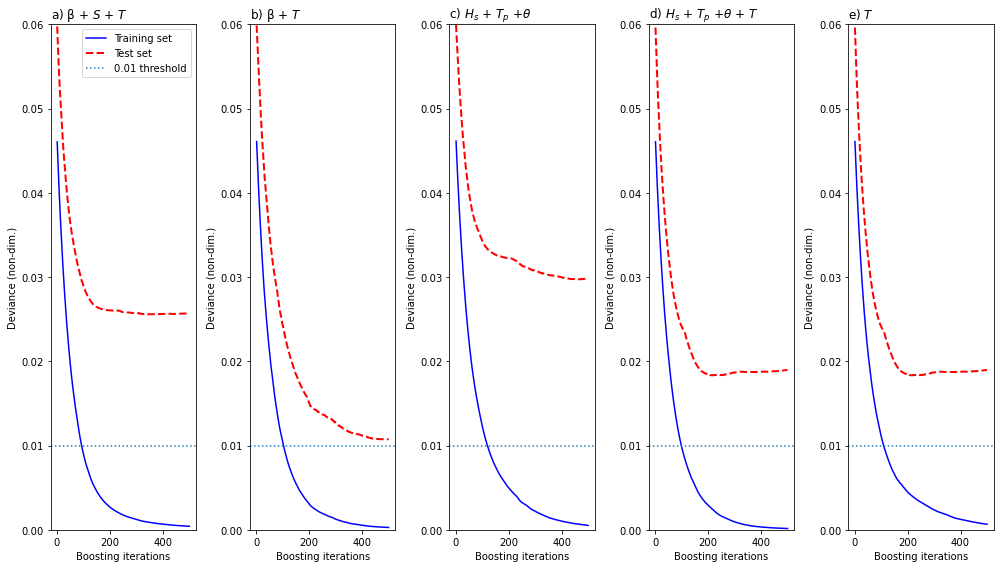

In [77]:
fig=plt.figure(figsize=(14,8))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred1 in enumerate(model1.staged_predict(X_test1)):
    test_score[i] = model1.loss_(y_test1, y_pred1)
    
plt.subplot(1, 5, 1)
plt.title("a) β + $S$ + $T$ ", loc='left')
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    model1.train_score_,
    "b-",
    label="Training set",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r--", label="Test set", lw=2
)
plt.axhline(0.01, linestyle=':',label='0.01 threshold')
plt.legend(loc="upper right")
plt.xlabel("Boosting iterations")
plt.ylabel("Deviance (non-dim.)")
plt.ylim(0,.06)

test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred2 in enumerate(model2.staged_predict(X_test2)):
    test_score[i] = model2.loss_(y_test2, y_pred2)
    
plt.subplot(1, 5, 2)
plt.title("b) β + $T$", loc='left')
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    model2.train_score_,
    "b-",
    label="Training set",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r--", label="Test set", lw=2
)
plt.axhline(0.01, linestyle=':',label='0.01 threshold')
# plt.legend(loc="upper right")
plt.xlabel("Boosting iterations")
plt.ylabel("Deviance (non-dim.)")
plt.ylim(0,.06)

test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred3 in enumerate(model3.staged_predict(X_test3)):
    test_score[i] = model3.loss_(y_test3, y_pred3)
    
plt.subplot(1, 5, 3)
plt.title(r"c) $H_s$ + $T_p$ +$\theta$", loc='left')
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    model3.train_score_,
    "b-",
    label="Training set",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r--", label="Test set", lw=2
)
plt.axhline(0.01, linestyle=':',label='0.01 threshold')
# plt.legend(loc="upper right")
plt.xlabel("Boosting iterations")
plt.ylabel("Deviance (non-dim.)")
plt.ylim(0,.06)

test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred4 in enumerate(model4.staged_predict(X_test4)):
    test_score[i] = model4.loss_(y_test4, y_pred4)
    
plt.subplot(1, 5, 4)
plt.title(r"d) $H_s$ + $T_p$ +$\theta$ + $T$", loc='left')
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    model4.train_score_,
    "b-",
    label="Training set",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r--", label="Test set", lw=2
)
plt.axhline(0.01, linestyle=':',label='0.01 threshold')
# plt.legend(loc="upper right")
plt.xlabel("Boosting iterations")
plt.ylabel("Deviance (non-dim.)")
plt.ylim(0,.06)

plt.subplot(1, 5, 5)
plt.title(r"e) $T$", loc='left')
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    model5.train_score_,
    "b-",
    label="Training set",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r--", label="Test set", lw=2
)
plt.axhline(0.01, linestyle=':',label='0.01 threshold')
# plt.legend(loc="upper right")
plt.xlabel("Boosting iterations")
plt.ylabel("Deviance (non-dim.)")
plt.ylim(0,.06)

fig.tight_layout()
# plt.show()
plt.savefig('model_plots/CGRASP_d50-4models-training-v2.jpg', dpi=300, bbox_inches='tight')

best model is slope + tide : best R^2, lowest mean perxetn error, and lowest model loss

### Feature importances

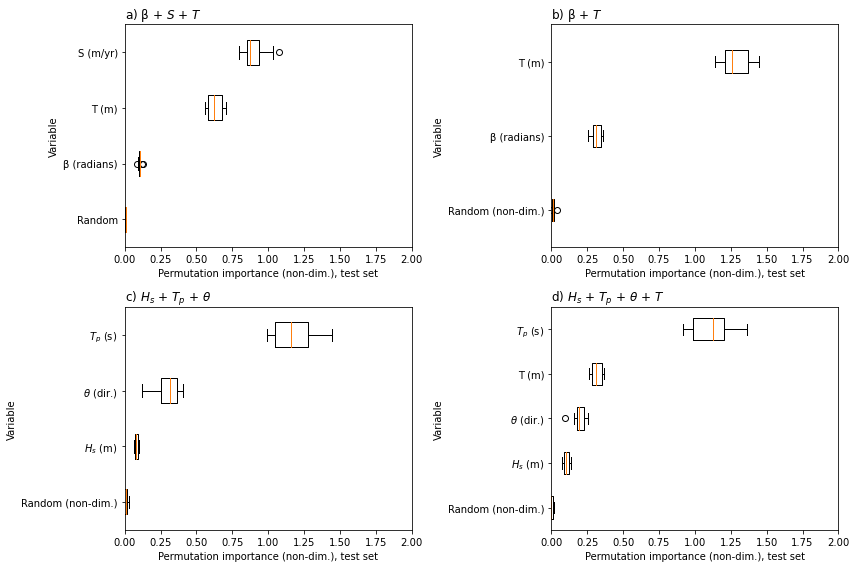

In [78]:

fig=plt.figure(figsize=(12,8))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

result = permutation_importance(
    model1, X_test1, y_test1, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(221)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(feature_names1)[sorted_idx],
)
plt.xlim(0,2)
plt.title("a) β + $S$ + $T$ ", loc='left')
plt.xlabel("Permutation importance (non-dim.), test set")
plt.ylabel("Variable")


result = permutation_importance(
    model2, X_test2, y_test3, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(222)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(feature_names2)[sorted_idx],
)

plt.xlim(0,2)
plt.title("b) β + $T$ ", loc='left')
plt.xlabel("Permutation importance (non-dim.), test set")
plt.ylabel("Variable")

result = permutation_importance(
    model3, X_test3, y_test3, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(223)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(feature_names3)[sorted_idx],
)
plt.xlim(0,2)
plt.title(r"c) $H_s$ + $T_p$ + $\theta$ ", loc='left')
plt.xlabel("Permutation importance (non-dim.), test set")
plt.ylabel("Variable")

result = permutation_importance(
    model4, X_test4, y_test4, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(224)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(feature_names4)[sorted_idx],
)
plt.xlim(0,2)
plt.title(r"d) $H_s$ + $T_p$ + $\theta$ + $T$ ", loc='left')
plt.xlabel("Permutation importance (non-dim.), test set")
plt.ylabel("Variable")

fig.tight_layout()

plt.savefig('model_plots/CGRASP_d50-4models-featimps-v2.jpg', dpi=300, bbox_inches='tight')


all features are more important than random! but Hs is barely ...

## partial correlation analysis

In [79]:
partial_corr(data=tmp, x='beach_slope', y='d50', covar=['mstr'], method='pearson')

,n,r,CI95%,p-val
pearson,216,-0.005956,"[-0.14, 0.13]",0.930809


In [80]:
.4**2

0.16000000000000003

In [81]:
partial_corr(data=tmp, x='mstr', y='d50', covar=['beach_slope'], method='pearson')

,n,r,CI95%,p-val
pearson,216,0.27943,"[0.15, 0.4]",0.000032


In [82]:
.58**2

0.3364

In [83]:
partial_corr(data=tmp, x='mstr', y='d50', covar=['beach_slope','hs_mean','tp','dir'], method='pearson')

,n,r,CI95%,p-val
pearson,216,0.108999,"[-0.03, 0.24]",0.113563


In [84]:
partial_corr(data=tmp, x='beach_slope', y='d50', covar=['mstr','hs_mean','tp','dir'], method='pearson')

,n,r,CI95%,p-val
pearson,216,0.004511,"[-0.13, 0.14]",0.947937


In [85]:
partial_corr(data=tmp, x='mstr', y='d50', covar=['beach_slope','dir'], method='pearson')

,n,r,CI95%,p-val
pearson,216,0.246456,"[0.12, 0.37]",0.000272


In [86]:
partial_corr(data=tmp, x='mstr', y='d50', covar=['beach_slope','dir'], method='pearson')

,n,r,CI95%,p-val
pearson,216,0.246456,"[0.12, 0.37]",0.000272


In [87]:
X = pg.pairwise_corr(tmp[['beach_slope','trend','d50','mstr','tp','dir','hs_mean']].copy(), columns=['d50'], method='spearman', alternative='greater', padjust='bonf').round(3)

In [88]:
X

,X,Y,method,alternative,n,r,CI95%,p-unc,p-corr,p-adjust,power
0,d50,beach_slope,spearman,greater,216,-0.187,"[-0.29, 1.0]",0.997,1.0,bonf,0.000
1,d50,trend,spearman,greater,216,0.278,"[0.17, 1.0]",0.000,0.0,bonf,0.994
2,d50,mstr,spearman,greater,216,0.334,"[0.23, 1.0]",0.000,0.0,bonf,1.000
3,d50,tp,spearman,greater,216,-0.714,"[-0.77, 1.0]",1.000,1.0,bonf,0.000
4,d50,dir,spearman,greater,216,0.322,"[0.22, 1.0]",0.000,0.0,bonf,0.999
5,d50,hs_mean,spearman,greater,216,-0.571,"[-0.64, 1.0]",1.000,1.0,bonf,0.000


In [89]:
# lower = np.vstack(X['CI95%'].values)[:,0]
# upper = np.vstack(X['CI95%'].values)[:,1]

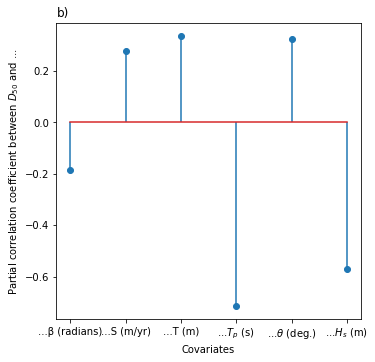

In [90]:

plt.figure(figsize=(12,12))
ax=plt.subplot(222)
plt.stem(X['r'])
# plt.stem(lower)
# plt.stem(upper)
plt.xticks([0,1,2,3,4,5])
ax.set_xticklabels(['...β (radians)','...S (m/yr)', '...T (m)',r'...$T_p$ (s)',r'...$\theta$ (deg.)',r'...$H_s$ (m)'])

plt.ylabel(r'Partial correlation coefficient between $D_{50}$ and ...')
plt.xlabel(r'Covariates')
plt.title(r"b)", loc='left')

plt.savefig('data_plots/Partial_correl_b.jpg', dpi=300, bbox_inches='tight')

I think it is wrong to intrepret low feature importance in purely physical terms. For example, there is a lot of multi colinearity in the input variables - between T and slope, and between Hs and T, Tp, and Dir

Hs doesnt feature in the model because of multi-colinearity

In [91]:
# tmp.keys()

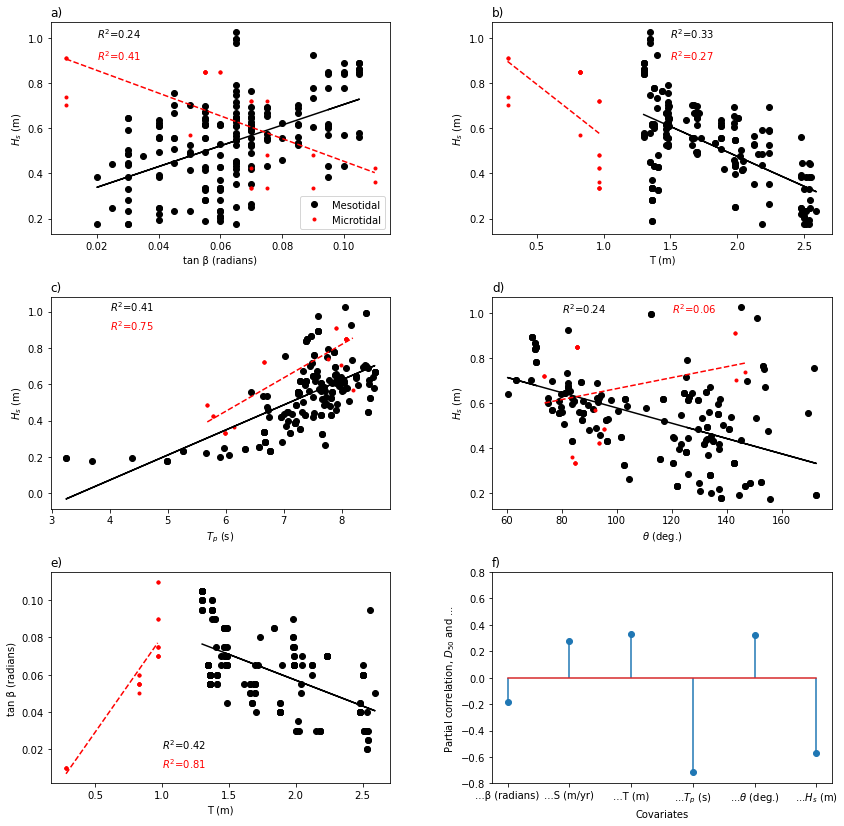

In [92]:
plt.figure(figsize=(14,14))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

#=================================
# plt.subplot(331)
plt.subplot(321)
plt.plot(tmp['beach_slope'][tmp['mstr']>=1],tmp['hs_mean'][tmp['mstr']>=1],'ko', label='Mesotidal')
plt.plot(tmp['beach_slope'][tmp['mstr']<1],tmp['hs_mean'][tmp['mstr']<1],'r.', label='Microtidal')

coef = np.polyfit(tmp['beach_slope'][tmp['mstr']>=1],tmp['hs_mean'][tmp['mstr']>=1],1)
poly1d_fn = np.poly1d(coef) 
plt.plot(tmp['beach_slope'][tmp['mstr']>=1], poly1d_fn(tmp['beach_slope'][tmp['mstr']>=1]), '-k')

coef = np.polyfit(tmp['beach_slope'][tmp['mstr']<1],tmp['hs_mean'][tmp['mstr']<1],1)
poly1d_fn = np.poly1d(coef) 
plt.plot(sorted(tmp['beach_slope'][tmp['mstr']<1]), poly1d_fn(sorted(tmp['beach_slope'][tmp['mstr']<1])), '--r')

r2 = np.min(np.corrcoef(tmp['hs_mean'][tmp['mstr']>=1], tmp['beach_slope'][tmp['mstr']>=1]))**2
plt.text(.02,1,r'$R^2$='+str(r2)[:4])

r2 = np.min(np.corrcoef(tmp['hs_mean'][tmp['mstr']<1], tmp['beach_slope'][tmp['mstr']<1]))**2
plt.text(.02,.9,r'$R^2$='+str(r2)[:4], color='r')

plt.ylabel(r'$H_s$ (m)')
plt.xlabel(r'tan β (radians)')
plt.title(r"a)", loc='left')
plt.legend()

#================================
# plt.subplot(332)
plt.subplot(322)
plt.plot(tmp['mstr'][tmp['mstr']>=1],tmp['hs_mean'][tmp['mstr']>=1],'ko')
plt.plot(tmp['mstr'][tmp['mstr']<1],tmp['hs_mean'][tmp['mstr']<1],'r.')

coef = np.polyfit(tmp['mstr'][tmp['mstr']>=1],tmp['hs_mean'][tmp['mstr']>=1],1)
poly1d_fn = np.poly1d(coef) 
plt.plot(tmp['mstr'][tmp['mstr']>=1], poly1d_fn(tmp['mstr'][tmp['mstr']>=1]), '-k')

coef = np.polyfit(tmp['mstr'][tmp['mstr']<1],tmp['hs_mean'][tmp['mstr']<1],1)
poly1d_fn = np.poly1d(coef) 
plt.plot(sorted(tmp['mstr'][tmp['mstr']<1]), poly1d_fn(sorted(tmp['mstr'][tmp['mstr']<1])), '--r')

r2 = np.min(np.corrcoef(tmp['hs_mean'][tmp['mstr']>=1], tmp['mstr'][tmp['mstr']>=1]))**2
plt.text(1.5,1,r'$R^2$='+str(r2)[:4])

r2 = np.min(np.corrcoef(tmp['hs_mean'][tmp['mstr']<1], tmp['mstr'][tmp['mstr']<1]))**2
plt.text(1.5,.9,r'$R^2$='+str(r2)[:4], color='r')

plt.ylabel(r'$H_s$ (m)')
plt.xlabel(r'T (m)')
plt.title(r"b)", loc='left')

#=================================
# plt.subplot(334)
plt.subplot(323)
plt.plot(tmp['tp'][tmp['mstr']>=1],tmp['hs_mean'][tmp['mstr']>=1],'ko')
plt.plot(tmp['tp'][tmp['mstr']<1],tmp['hs_mean'][tmp['mstr']<1],'r.')

coef = np.polyfit(tmp['tp'][tmp['mstr']>=1],tmp['hs_mean'][tmp['mstr']>=1],1)
poly1d_fn = np.poly1d(coef) 
plt.plot(tmp['tp'][tmp['mstr']>=1], poly1d_fn(tmp['tp'][tmp['mstr']>=1]), '-k')

coef = np.polyfit(tmp['tp'][tmp['mstr']<1],tmp['hs_mean'][tmp['mstr']<1],1)
poly1d_fn = np.poly1d(coef) 
plt.plot(sorted(tmp['tp'][tmp['mstr']<1]), poly1d_fn(sorted(tmp['tp'][tmp['mstr']<1])), '--r')

r2 = np.min(np.corrcoef(tmp['hs_mean'][tmp['mstr']>=1], tmp['tp'][tmp['mstr']>=1]))**2
plt.text(4,1,r'$R^2$='+str(r2)[:4])

r2 = np.min(np.corrcoef(tmp['hs_mean'][tmp['mstr']<1], tmp['tp'][tmp['mstr']<1]))**2
plt.text(4,.9,r'$R^2$='+str(r2)[:4], color='r')

plt.ylabel(r'$H_s$ (m)')
plt.xlabel(r'$T_p$ (s)')
plt.title(r"c)", loc='left')

#=================================
# plt.subplot(335)
plt.subplot(324)
plt.plot(tmp['dir'][tmp['mstr']>=1],tmp['hs_mean'][tmp['mstr']>=1],'ko')
plt.plot(tmp['dir'][tmp['mstr']<1],tmp['hs_mean'][tmp['mstr']<1],'r.')

coef = np.polyfit(tmp['dir'][tmp['mstr']>=1],tmp['hs_mean'][tmp['mstr']>=1],1)
poly1d_fn = np.poly1d(coef) 
plt.plot(tmp['dir'][tmp['mstr']>=1], poly1d_fn(tmp['dir'][tmp['mstr']>=1]), '-k')

coef = np.polyfit(tmp['dir'][tmp['mstr']<1],tmp['hs_mean'][tmp['mstr']<1],1)
poly1d_fn = np.poly1d(coef) 
plt.plot(sorted(tmp['dir'][tmp['mstr']<1]), poly1d_fn(sorted(tmp['dir'][tmp['mstr']<1])), '--r')

r2 = np.min(np.corrcoef(tmp['hs_mean'][tmp['mstr']>=1], tmp['dir'][tmp['mstr']>=1]))**2
plt.text(80,1,r'$R^2$='+str(r2)[:4])

r2 = np.min(np.corrcoef(tmp['hs_mean'][tmp['mstr']<1], tmp['dir'][tmp['mstr']<1]))**2
plt.text(120,1,r'$R^2$='+str(r2)[:4], color='r')

plt.ylabel(r'$H_s$ (m)')
plt.xlabel(r'$\theta$ (deg.)')
plt.title(r"d)", loc='left')

#=================================
# plt.subplot(233)
plt.subplot(325)
plt.plot(tmp['mstr'][tmp['mstr']>=1],tmp['beach_slope'][tmp['mstr']>=1],'ko')
plt.plot(tmp['mstr'][tmp['mstr']<1],tmp['beach_slope'][tmp['mstr']<1],'r.')

coef = np.polyfit(tmp['mstr'][tmp['mstr']>=1],tmp['beach_slope'][tmp['mstr']>=1],1)
poly1d_fn = np.poly1d(coef) 
plt.plot(tmp['mstr'][tmp['mstr']>=1], poly1d_fn(tmp['mstr'][tmp['mstr']>=1]), '-k')

coef = np.polyfit(tmp['mstr'][tmp['mstr']<1],tmp['beach_slope'][tmp['mstr']<1],1)
poly1d_fn = np.poly1d(coef) 
plt.plot(sorted(tmp['mstr'][tmp['mstr']<1]), poly1d_fn(sorted(tmp['mstr'][tmp['mstr']<1])), '--r')

r2 = np.min(np.corrcoef(tmp['beach_slope'][tmp['mstr']>=1], tmp['mstr'][tmp['mstr']>=1]))**2
plt.text(1,0.02,r'$R^2$='+str(.1+r2)[:4])

r2 = np.min(np.corrcoef(tmp['beach_slope'][tmp['mstr']<1], tmp['mstr'][tmp['mstr']<1]))**2
plt.text(1,0.01,r'$R^2$='+str(r2)[:4], color='r')

plt.ylabel(r'tan β (radians)')
plt.xlabel(r'T (m)')
plt.title(r"e)", loc='left')

#=================================
ax=plt.subplot(326)
plt.stem(X['r'])
# plt.stem(lower)
# plt.stem(upper)
plt.xticks([0,1,2,3,4,5])
ax.set_xticklabels(['...β (radians)','...S (m/yr)', '...T (m)',r'...$T_p$ (s)',r'...$\theta$ (deg.)',r'...$H_s$ (m)'])
plt.ylim(-.8,.8)
plt.ylabel(r'Partial correlation, $D_{50}$ and ...')
plt.xlabel(r'Covariates')
plt.title(r"f)", loc='left')

plt.savefig('data_plots/multicol_plus_partial_correl.jpg', dpi=300, bbox_inches='tight')

### Save model

In [93]:
np.save(dataset.replace('.csv','_model1.npy').replace('model_data_out','model_out'), model1out, allow_pickle=True)
np.save(dataset.replace('.csv','_model2.npy').replace('model_data_out','model_out'), model2out, allow_pickle=True)
np.save(dataset.replace('.csv','_model3.npy').replace('model_data_out','model_out'), model3out, allow_pickle=True)
np.save(dataset.replace('.csv','_model4.npy').replace('model_data_out','model_out'), model4out, allow_pickle=True)
np.save(dataset.replace('.csv','_model5.npy').replace('model_data_out','model_out'), model5out, allow_pickle=True)

In [94]:
import xgboost as xgb

C:\Users\dbuscombe\Anaconda3\envs\cgrasp\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [95]:
params = {
    'n_estimators':500, 
    'max_depth':4, 
    'eta':0.01,  ##lr
    'subsample':1.0, 
    'colsample_bytree':1.0
}

In [96]:
model1 = xgb.XGBRegressor(**params)
model1.fit(X_train1, y_train1)
mse1 = mean_squared_error(y_test1, model1.predict(X_test1))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse1))

The mean squared error (MSE) on test set: 0.0242


In [97]:
model2 = xgb.XGBRegressor(**params)
model2.fit(X_train2, y_train2)
mse2 = mean_squared_error(y_test2, model2.predict(X_test2))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse2))

The mean squared error (MSE) on test set: 0.0135


In [98]:
model3 = xgb.XGBRegressor(**params)
model3.fit(X_train3, y_train3)
mse3 = mean_squared_error(y_test3, model3.predict(X_test3))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse3))

The mean squared error (MSE) on test set: 0.0364


In [99]:
model4 = xgb.XGBRegressor(**params)
model4.fit(X_train4, y_train4)
mse4 = mean_squared_error(y_test4, model4.predict(X_test4))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse4))

The mean squared error (MSE) on test set: 0.0236


In [102]:
model5 = xgb.XGBRegressor(**params)
model5.fit(X_train5, y_train5)
mse5 = mean_squared_error(y_test5, model5.predict(X_test5))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse5))

The mean squared error (MSE) on test set: 0.0244


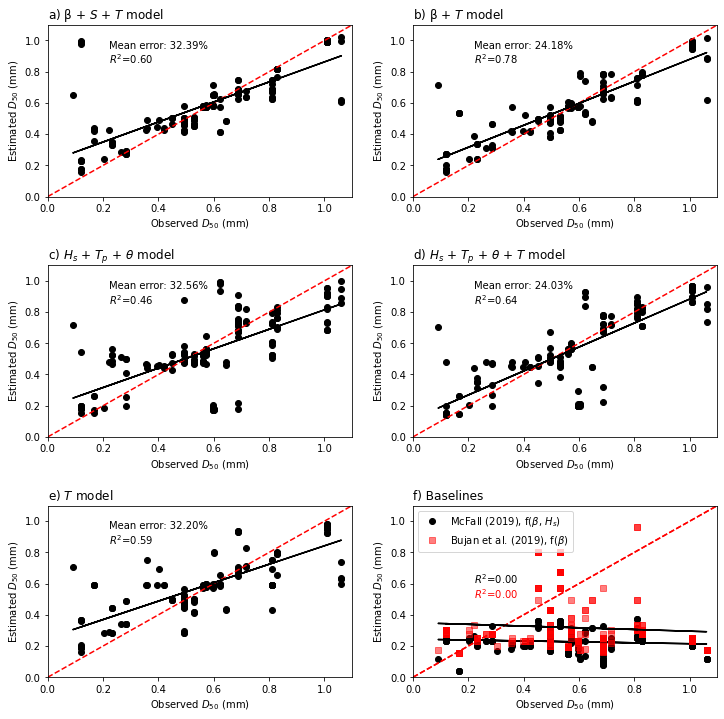

In [103]:
plt.figure(figsize=(12,12))
plt.subplots_adjust(wspace=0.2, hspace=0.4)

plt.subplot(321)
ds_est = model1.predict(X_test1)
plt.plot(y_test1, ds_est, 'ko')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title("a) β + $S$ + $T$ model", loc='left')
r2 = np.min(np.corrcoef(y_test1, ds_est))**2
plt.text(.22,.85,r'$R^2$='+str(r2)[:4])
plt.text(.22,.95, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test1,ds_est)))[:5]))

coef = np.polyfit(y_test1, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test1, poly1d_fn(y_test1), '-k')

plt.subplot(322)
ds_est = model2.predict(X_test2)
plt.plot(y_test2, ds_est, 'ko')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title("b) β + $T$ model", loc='left')
r2 = np.min(np.corrcoef(y_test2, ds_est))**2
plt.text(.22,.85,r'$R^2$='+str(r2)[:4])

coef = np.polyfit(y_test2, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test2, poly1d_fn(y_test2), '-k')
plt.text(.22,.95, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test2,ds_est)))[:5]))

plt.subplot(323)
ds_est = model3.predict(X_test3)
plt.plot(y_test3, ds_est, 'ko')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"c) $H_s$ + $T_p$ + $\theta$ model", loc='left')
r2 = np.min(np.corrcoef(y_test3, ds_est))**2
plt.text(.22,.85,r'$R^2$='+str(r2)[:4])

coef = np.polyfit(y_test3, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test3, poly1d_fn(y_test3), '-k')
plt.text(.22,.95, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test3,ds_est)))[:5]))


plt.subplot(324)
ds_est = model4.predict(X_test4)
plt.plot(y_test4, ds_est, 'ko')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"d) $H_s$ + $T_p$ + $\theta$ + $T$ model", loc='left')
r2 = np.min(np.corrcoef(y_test4, ds_est))**2
plt.text(.22,.85,r'$R^2$='+str(r2)[:4])

coef = np.polyfit(y_test4, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test4, poly1d_fn(y_test4), '-k')
plt.text(.22,.95, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test4,ds_est)))[:5]))


plt.subplot(325)
ds_est = model5.predict(X_test5)
plt.plot(y_test5, ds_est, 'ko')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"e) $T$ model", loc='left')
r2 = np.min(np.corrcoef(y_test5, ds_est))**2
plt.text(.22,.85,r'$R^2$='+str(r2)[:4])

coef = np.polyfit(y_test5, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test5, poly1d_fn(y_test5), '-k')
plt.text(.22,.95, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test5,ds_est)))[:5]))


plt.subplot(326)
plt.plot(tmp['d50'], ds_est_baseline, 'ko', label=r'McFall (2019), f($\beta$, $H_s$)')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"f) Baselines", loc='left')
r2 = np.min(np.corrcoef(tmp['d50'], ds_est_baseline))**2
plt.text(.22,.6,r'$R^2$='+str(r2)[:4])

coef = np.polyfit(tmp['d50'], ds_est_baseline,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(tmp['d50'], poly1d_fn(tmp['d50']), '-k')


# plt.subplot(326)
plt.plot(tmp['d50'], ds_est_baseline2, 'rs', alpha=0.5, label=r"Bujan et al. (2019), f($\beta$)")
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
# plt.title(r"f) Bujan et al. (2019) relation, f($\beta$)", loc='left')
r2 = np.min(np.corrcoef(tmp['d50'], ds_est_baseline2))**2
plt.text(.22,.5,r'$R^2$='+str(r2)[:4], color='r')

coef = np.polyfit(tmp['d50'], ds_est_baseline2,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(tmp['d50'], poly1d_fn(tmp['d50']), '-k')
plt.legend()

plt.savefig('model_plots/CGRASP_d50-6-XGBOOST-models-1:1.jpg', dpi=300, bbox_inches='tight')
# plt.close()

In [1092]:
# # extract the x and y coordinates as flat arrays
# # x = np.ravel(grid['latitude'].values)
# # y = np.ravel(grid['longitude'].values)

# x,y = np.meshgrid(grid['latitude'].values, grid['longitude'].values)

# x = np.ravel(x)
# y = np.ravel(y)
# d = np.ravel(grid['d50 (mm)'].values)

# print(x.shape)
# print(d.shape)

# # using the X and Y columns, build a dataframe, then the geodataframe
# df1 = pd.DataFrame({'X':x, 'Y':y, 'D':d})
# df1['coords'] = list(zip(df1['X'], df1['Y']))
# df1['coords'] = df1['coords'].apply(Point)
# gdf1 = gpd.GeoDataFrame(df1, geometry='coords')